In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import Data
import os
from configparser import ConfigParser
from baseline import Baseline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
import pickle
import matplotlib.ticker as ticker
%matplotlib inline

In [37]:
import torch

In [38]:
a = torch.randn(5, 7, dtype=torch.double)
a

tensor([[-0.3320, -1.7064, -0.9989, -1.6570, -0.2608,  1.2235,  0.6629],
        [-0.3192,  0.2252,  0.1055, -1.3297,  0.1443,  0.1085,  1.7744],
        [-0.3608,  1.0781,  1.5395, -0.5903, -0.0544,  2.2895, -0.1318],
        [ 0.3489,  0.6686,  0.0279, -0.2004,  0.6409,  0.1343,  0.2156],
        [-0.1250, -1.7346, -0.4058,  0.7514, -0.8881, -0.5962,  1.1308]],
       dtype=torch.float64)

In [41]:
a[a>=0.1] = 1
a[a<0.1] = 0
a

tensor([[0., 0., 0., 0., 0., 1., 1.],
        [0., 1., 1., 0., 1., 1., 1.],
        [0., 1., 1., 0., 0., 1., 0.],
        [1., 1., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 0., 0., 1.]], dtype=torch.float64)

tensor([[-0.3320, -1.7064, -0.9989, -1.6570, -0.2608,  1.0000,  1.0000],
        [-0.3192,  1.0000,  1.0000, -1.3297,  1.0000,  1.0000,  1.0000],
        [-0.3608,  1.0000,  1.0000, -0.5903, -0.0544,  1.0000, -0.1318],
        [ 1.0000,  1.0000,  0.0279, -0.2004,  1.0000,  1.0000,  1.0000],
        [-0.1250, -1.7346, -0.4058,  1.0000, -0.8881, -0.5962,  1.0000]],
       dtype=torch.float64)

In [29]:
l = list()
a = [1, 2, 4]
b = [2, 3, 4]
l.append(a)
l.append(b)
l = np.array(l)
print(l)
print(np.mean(l, axis=0))

[[1 2 4]
 [2 3 4]]
[1.5 2.5 4. ]


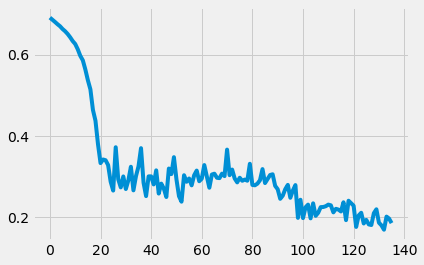

In [43]:
f_name = '/home/ashu/PycharmProjects/Main_Code/loss/baseline'
with open(os.path.join(f_name, 'baseline_7.pkl'), 'rb') as f:
    loss = pickle.load(f)
    
fig, ax = plt.subplots()
# this locator puts ticks at regular intervals
loc = ticker.MultipleLocator(base=0.2)
ax.yaxis.set_major_locator(loc)
ax.plot(loss)
plt.show()

In [20]:
loss_dir = '/home/ashu/PycharmProjects/Main_Code/loss/seq2seq'
ip_horizon = [i for i in range(1,8)]
loss = list()

for i in ip_horizon:
    name = 'seq2seq_' + str(i) + '.pkl'
    with open(os.path.join(loss_dir, name), 'rb') as f:
        loss.append(pickle.load(f))

3120


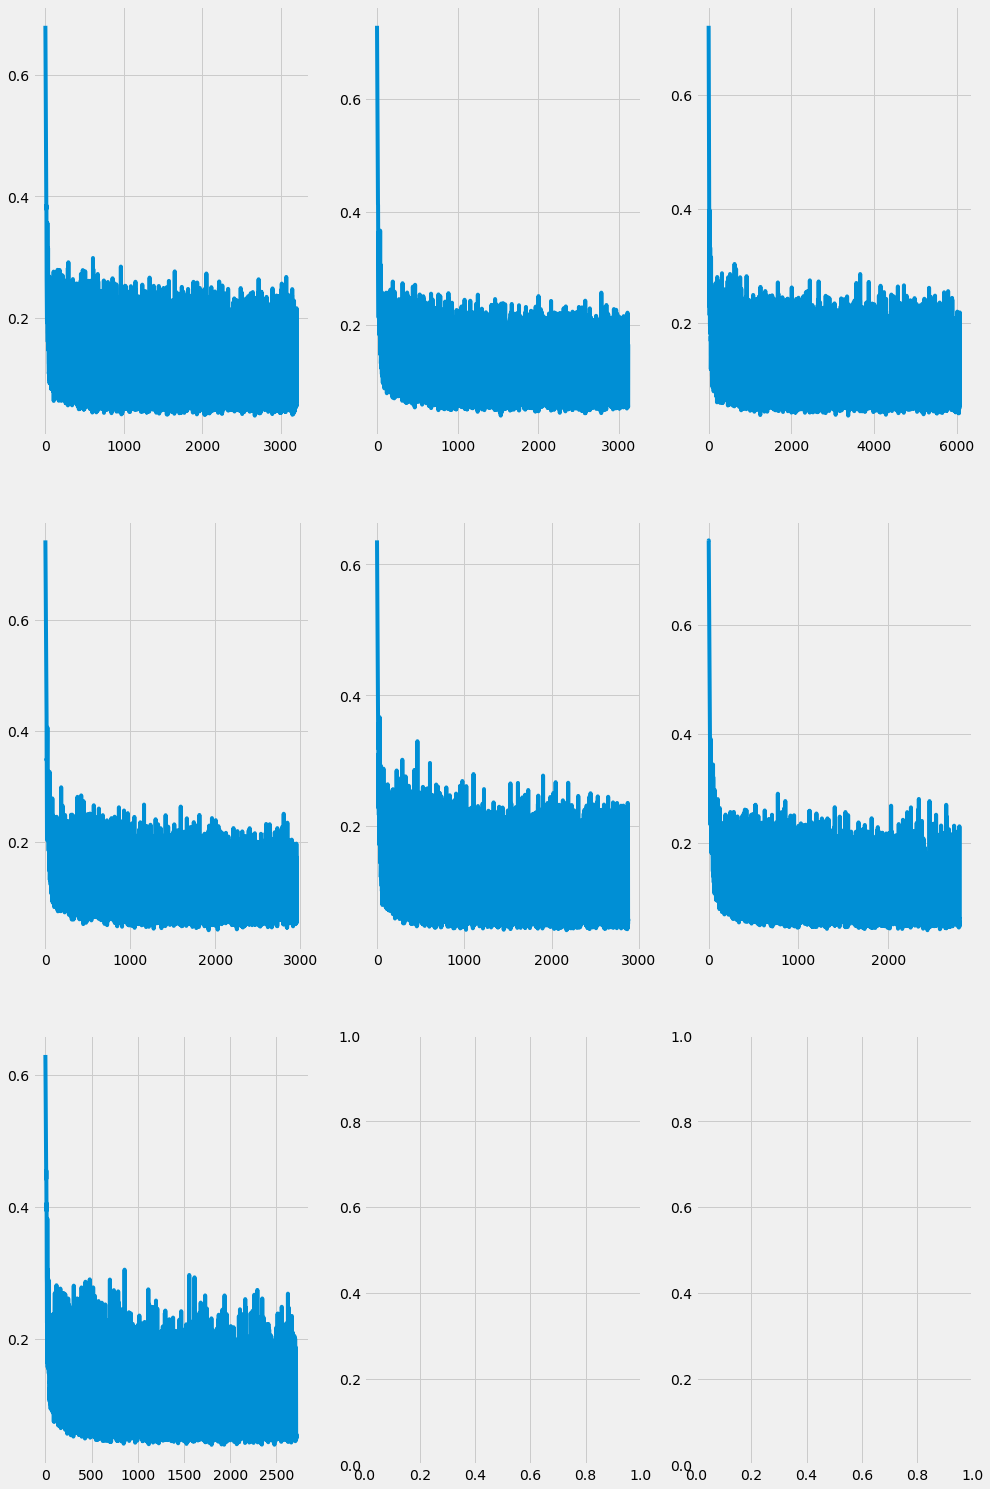

In [22]:
fig, ax = plt.subplots(3,3, figsize=(15,25))

idx = 0
for r in range(3):
    for c in range(3):
        
        loc = ticker.MultipleLocator(base=0.2)
        ax[r,c].yaxis.set_major_locator(loc)
        ax[r,c].plot(loss[idx])
        idx = idx + 1
        if idx == 7:
            break
plt.show()

In [42]:
#cat = [0, 1]
cat = [[0],[1]]
enc = OneHotEncoder()
enc.fit(cat)
enc.categories_


[array([0, 1])]

In [4]:
# original data
X = np.array([[0,1,1,0,0,0,0,1],
     [0,0,0,0,0,0,0,1],
     [0,1,1,0,1,0,0,1],
     [0,0,1,0,0,0,0,0],
     [0,1,1,0,0,0,1,1],
     [0,0,0,0,0,0,0,0]])

Y = [[0, 1, 1],
     [0, 0, 0],
     [1, 0, 1],
     [0, 0, 1],
     [0, 0, 1],
     [0, 0, 0]]

X_ = np.array([[0,1,1,0,0,0,0,1],
     [0,0,0,1,0,0,0,1],
     [0,1,0,0,1,0,0,1]])
Y_ = np.array([[0, 1, 1],
     [0, 0, 1],
     [1, 0, 0]])

In [37]:
a = [1,2,3]
for t in a:
    print([t])

[1]
[2]
[3]


In [29]:
def one_hot_enc(seq):
    enc_res = list()
    print(seq)
    cat = [[0],[1]]
    enc = OneHotEncoder()
    enc.fit(cat)
    for b in seq:
        #seq_res = list()
        for x in b:
            tmp = enc.transform(x.reshape(1,-1)).toarray()
            tmp = tmp.flatten()
            enc_res.append(tmp)
        #enc_res.append(seq_res)
        
    return np.array(enc_res).reshape(seq.shape[0],seq.shape[1], -1)

In [30]:
def one_hot_enc_inv_transform(seq):
    enc_res = list()
    print(seq)
    cat = [[0],[1]]
    enc = OneHotEncoder()
    enc.fit(cat)
    for b in seq:
        #for x in b:
            #print(x)
        tmp = enc.inverse_transform(b)
            #tmp = tmp.flatten()
        enc_res.append(tmp)
        #enc_res.append(seq_res)
        
    return np.array(enc_res).reshape(seq.shape[0],-1)

In [31]:
#for seq in X:
#    print(one_hot_enc(seq))
res = one_hot_enc(X)
#print(res)
print(one_hot_enc_inv_transform(res))

[[0 1 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]]
[[[1. 0.]
  [0. 1.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [0. 1.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]]
[[0 1 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [0 1 1 0 1 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]]


In [58]:
neigh = KNeighborsClassifier(n_neighbors=1, metric='matching', n_jobs=-1)
neigh.fit(X, Y)

In [28]:
enc = OneHotEncoder(categories=[[0,1]]*8)
#X_ = enc.fit_transform(X_).toarray()    
print(X)

[array([[1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]]), array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]]), array([[1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.]]), array([[1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.]]), array([[1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.]]), array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.]])]


In [74]:
neigh = KNeighborsClassifier(n_neighbors=1, metric='matching', n_jobs=-1)
neigh.fit(X, Y)

KNeighborsClassifier(metric='matching', n_jobs=-1, n_neighbors=1)

In [86]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(X, Y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [87]:
#pred = neigh.predict(X_)
pred = clf.predict(X_)
a = accuracy_score(Y_.ravel(), pred.ravel())
acc = balanced_accuracy_score(Y_.ravel(), pred.ravel())
f1 = f1_score(Y_.ravel(), pred.ravel())
print(pred)
print(a, acc, f1)

[[0 1 1]
 [0 0 0]
 [0 0 1]]
0.6666666666666666 0.65 0.5714285714285715


In [2]:
knn_cm = list()
rf_cm = list()

In [18]:
data_obj = Data()
config = ConfigParser()
config.read('config.ini')

df = data_obj.read_tsv()
baseline_approach = Baseline()
algo = config['train']['algo']

X_train, Y_train, X_test, Y_test = data_obj.split_train_test(df, 0, aggregate=True)

if algo == 'knn':
    acc, f1, cm = baseline_approach.nearest_neighbour(X_train, Y_train, X_test, Y_test, aggregate=True)
    knn_cm.append(cm)
elif algo == 'rf':
    acc, f1, cm = baseline_approach.random_forest(X_train, Y_train, X_test, Y_test, aggregate=True)
    rf_cm.append(cm)
print(len(knn_cm), len(rf_cm))

Min:  2020-05-26 15:15:00
Max:  2020-07-21 06:00:00
7 7


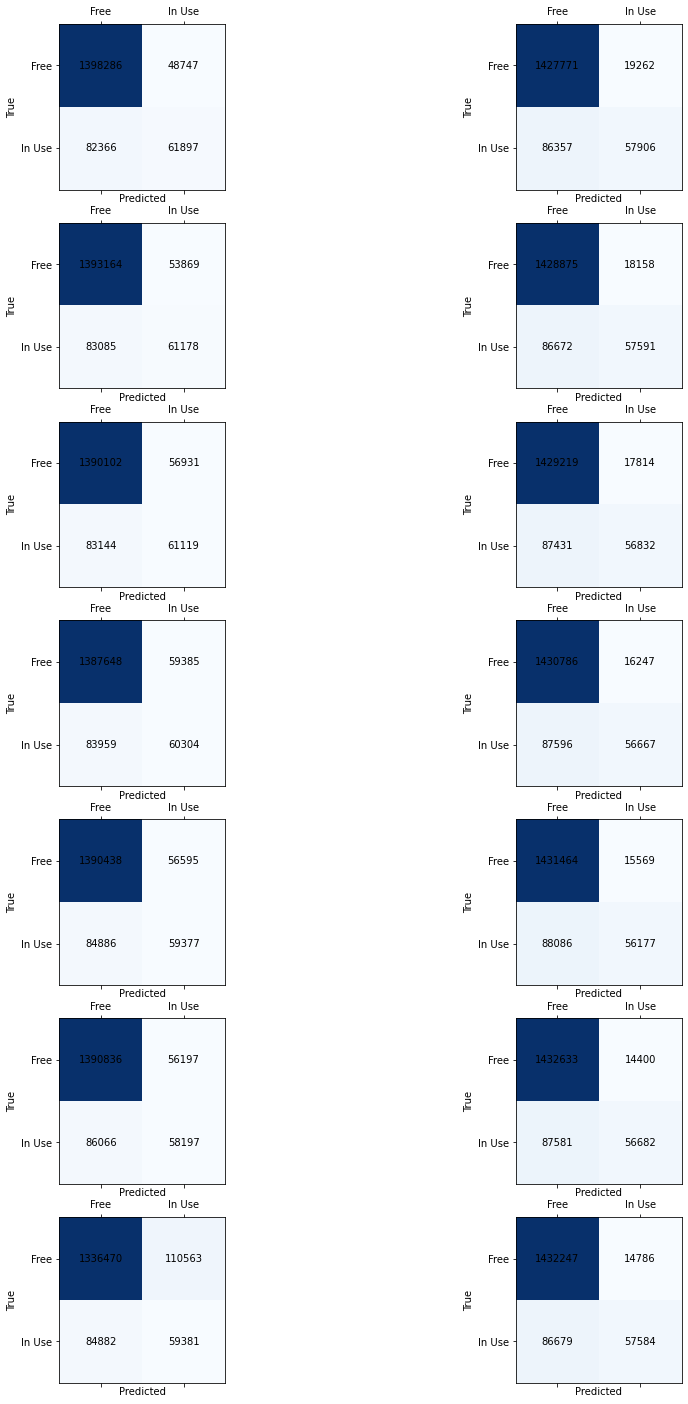

In [26]:
labels = ['Free', 'In Use']

fig, ax = plt.subplots(7,2, figsize=(15,25))

for r in range(7):
    for c in range(2):
        
        if c==0:
            cm_ = knn_cm[r]
        else:
            cm_ = rf_cm[r]
        
        ax[r,c].matshow(cm_, cmap=plt.cm.Blues)

        for i in range(len(cm_)):
            for j in range(len(cm_[0])):
                count = cm_[j,i]
                ax[r,c].text(i, j, str(count), va='center', ha='center')

        ax[r,c].set_xticklabels([''] + labels)
        ax[r,c].set_yticklabels([''] + labels)
        ax[r,c].set_xlabel('Predicted')
        ax[r,c].set_ylabel('True')
plt.show()

In [32]:
knn_result = pd.read_csv('result/knn_new.csv')
rf_result = pd.read_csv('result/rf_new.csv')
deepl_result = pd.read_csv('result/DeepL_new.csv')
deepl_result

,Model,n_train,n_test,input_horizon,output_horizon,optim,lr,epoch,bal acc,F1_0,F1_1
0,seq2seq,47360,16576,1,1,Adam,0.001,20,0.714219,0.963141,0.543824
1,seq2seq,46176,16576,2,1,Adam,0.001,20,0.700939,0.964960,0.536062
2,seq2seq,44992,16576,3,1,Adam,0.001,20,0.705640,0.965127,0.543354
3,seq2seq,43808,16576,4,1,Adam,0.001,20,0.715913,0.962376,0.542002
4,seq2seq,42624,16576,5,1,Adam,0.001,20,0.717125,0.961406,0.538611
5,seq2seq,41440,16576,6,1,Adam,0.001,20,0.703748,0.964589,0.537854
6,seq2seq,40256,16576,7,1,Adam,0.001,20,0.719057,0.959624,0.532350


In [11]:
knn_complete = knn_result[knn_result['Data'] == 'Complete']
#knn_individual = knn_result[knn_result['Data'] == 'Individual']
rf_complete = rf_result[rf_result['Data'] == 'Complete']
#rf_individual = rf_result[rf_result['Data'] == 'Individual']

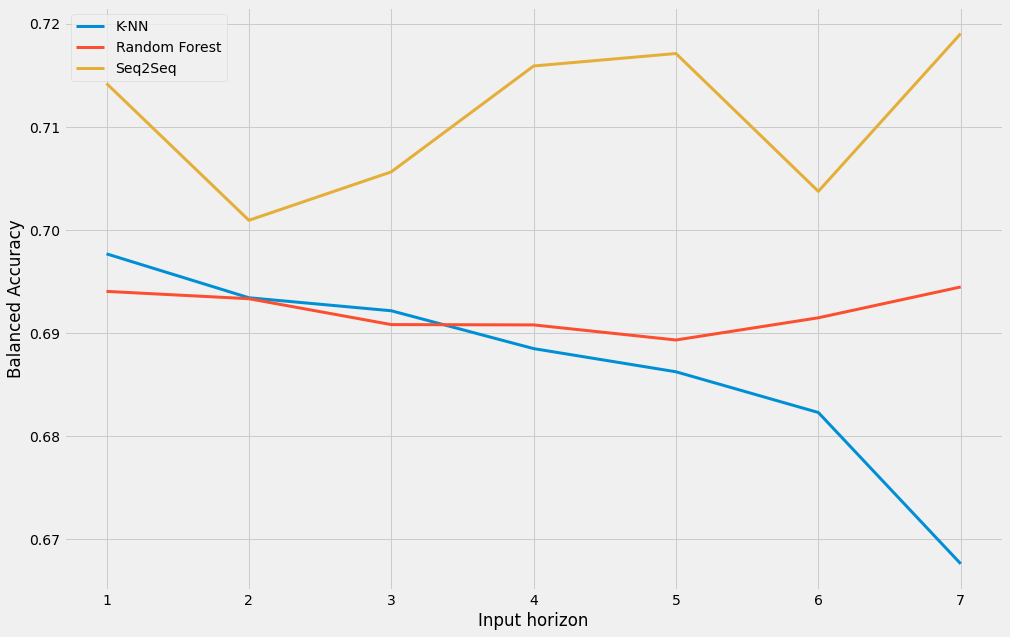

In [12]:
plt.style.use('fivethirtyeight')
#x_labels = [t.strftime("%H:%M") for t in daily_df.columns.values]
x_labels = knn_complete.Input_Horizon.values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.set_ylabel('Balanced Accuracy')
ax.set_xlabel('Input horizon')

plt.plot(x_labels, knn_complete.balanced_acurracy.values, linewidth=3, label='K-NN')
plt.plot(x_labels, rf_complete.balanced_acurracy.values, linewidth=3, label='Random Forest')
plt.plot(x_labels, deepl_result.bal_acc.values, linewidth=3, label='Seq2Seq')

plt.legend()
plt.show()

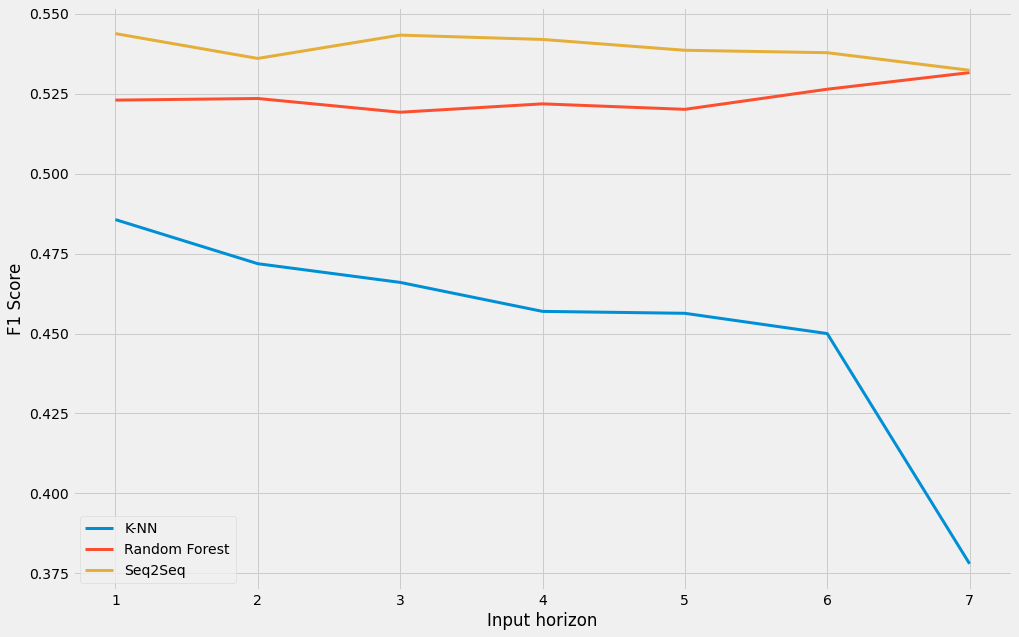

In [36]:
plt.style.use('fivethirtyeight')
#x_labels = [t.strftime("%H:%M") for t in daily_df.columns.values]
x_labels = knn_complete.Input_Horizon.values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.set_ylabel('F1 Score')
ax.set_xlabel('Input horizon')

plt.plot(x_labels, knn_result.f1_1.values, linewidth=3, label='K-NN')
plt.plot(x_labels, rf_result.f1_1.values, linewidth=3, label='Random Forest')
plt.plot(x_labels, deepl_result.F1_1.values, linewidth=3, label='Seq2Seq')


plt.legend()
plt.show()